In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import sys

from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import time


plt.rcParams["figure.figsize"] = (12, 9)
warnings.simplefilter("ignore")

sys.path.append("../1_Format_donnees/")
from aggregation import load_and_preprocess_agg_metrics, Scaler_Metrics
sys.path.append("../")

from evaluate import plot_confusion_matrix, get_scores, plot_feature_importance

### <8 mbits en cumsum = bruit 

In [2]:
time_counter = time.time_ns()

df_test = load_and_preprocess_agg_metrics("../Mesures/test")
df_train = load_and_preprocess_agg_metrics("../Mesures/train")


process_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Dataset generation took : {process_duration} s")

Load datasets...
Extracting ../Mesures/test\messenger20221124_151137.csv.... 1/7


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 14.71it/s]


Extracting ../Mesures/test\messenger20230208_132747.csv.... 2/7


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:05<00:00,  4.51it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 3/7


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.09it/s]


Extracting ../Mesures/test\spotify20230127_134348.csv.... 4/7


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 542.51it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 5/7


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 18.92it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 6/7


100%|███████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 540.40it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 7/7


  0%|                                                                                          | 0/765 [00:00<?, ?it/s]

Computing metrics and statistics...


100%|████████████████████████████████████████████████████████████████████████████████| 765/765 [00:22<00:00, 34.64it/s]


Load datasets...
Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/39


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 122.00it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/39


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 40.50it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 3/39


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 92.89it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 4/39


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 11.70it/s]


Extracting ../Mesures/train\messenger20221129_151124.csv.... 5/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.72it/s]


Extracting ../Mesures/train\messenger20230207_133921.csv.... 6/39


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.44it/s]


Extracting ../Mesures/train\messenger20230209_083453.csv.... 7/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.60it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 8/39


100%|███████████████████████████████████████████████████████████████████████████████| 805/805 [00:01<00:00, 615.53it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 9/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 12.22it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 10/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 33.86it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 11/39


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.69it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 12/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.45it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 13/39


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 40.87it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 14/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 28.80it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 15/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.28it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 16/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.56it/s]


Extracting ../Mesures/train\spotify20230201_092702.csv.... 17/39


100%|█████████████████████████████████████████████████████████████████████████████| 1750/1750 [00:03<00:00, 552.80it/s]


Extracting ../Mesures/train\spotify20230203_165507.csv.... 18/39


100%|███████████████████████████████████████████████████████████████████████████████| 522/522 [00:00<00:00, 618.74it/s]


Extracting ../Mesures/train\spotify20230216_141318.csv.... 19/39


100%|███████████████████████████████████████████████████████████████████████████████| 364/364 [00:00<00:00, 602.68it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 20/39


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 96.14it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 21/39


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 53.37it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 22/39


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 74.84it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 23/39


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 98.48it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 24/39


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 254.92it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 25/39


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 406.72it/s]


Extracting ../Mesures/train\youtube20221108_165214.csv.... 26/39
Extracting ../Mesures/train\youtube20221108_182416.csv.... 27/39


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 256.41it/s]


Extracting ../Mesures/train\youtube20221124_125524.csv.... 28/39


100%|███████████████████████████████████████████████████████████████████████████████| 186/186 [00:00<00:00, 569.42it/s]


Extracting ../Mesures/train\youtube20221124_154037.csv.... 29/39


100%|█████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 552.96it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 30/39


 65%|████████████████████████████████████████████████████▌                            | 61/94 [00:00<00:00, 604.51it/s]

Extracting ../Mesures/train\youtube20230110_145404.csv.... 31/39


  0%|                                                                                           | 0/90 [00:00<?, ?it/s]

Extracting ../Mesures/train\youtube20230110_161955.csv.... 32/39


100%|█████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 535.50it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 33/39


  0%|                                                                                           | 0/29 [00:00<?, ?it/s]

Extracting ../Mesures/train\youtube20230112_151029.csv.... 34/39


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 422.70it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 35/39


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 368.00it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 36/39


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 473.50it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 37/39


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 265.20it/s]


Extracting ../Mesures/train\youtube20230118_134041.csv.... 38/39


100%|███████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 235.03it/s]


Extracting ../Mesures/train\youtube20230124_124323.csv.... 39/39


  0%|                                                                                         | 0/5593 [00:00<?, ?it/s]

Computing metrics and statistics...


100%|██████████████████████████████████████████████████████████████████████████████| 5593/5593 [01:01<00:00, 91.63it/s]


Dataset generation took : 276.9418616 s


In [3]:
scaler = Scaler_Metrics()
training_data = scaler.fit_transform(df_train)
testing_data = scaler.transform(df_test)
training_data

,reg_lin_R2_TBS_up,reg_lin_coef_A_TBS_up,p0_TBS_up,p10_TBS_up,p25_TBS_up,p50_TBS_up,p75_TBS_up,p90_TBS_up,p100_TBS_up,mean_TBS_up,...,p0_TBS_down,p10_TBS_down,p25_TBS_down,p50_TBS_down,p75_TBS_down,p90_TBS_down,p100_TBS_down,mean_TBS_down,std_TBS_down,label
id,,,,,,,,,,,,,,,,,,,,,
20221117_125310_4,1.268925,3.957978,-0.117147,0.037114,-0.043410,-0.007785,1.198798,1.421729,2.458738,1.161802,...,0.831847,-0.028340,-0.217020,-0.337063,-0.054285,-0.133215,1.280066,-0.127465,-0.182687,messenger
20221117_125310_8,1.249231,3.904872,-0.078368,0.037114,-0.043410,-0.007785,1.341848,1.751197,1.649851,1.173663,...,-0.136666,-0.028340,-0.217020,-0.213639,-0.100444,-0.176051,0.342232,-0.110443,-0.092446,messenger
20221117_125310_7,1.260810,3.977438,-0.136536,-0.010913,-0.043410,0.568243,1.449134,0.823539,1.469472,0.871035,...,-0.015602,-0.028340,-0.217020,-0.337063,-0.137371,-0.118936,-0.002900,-0.205812,-0.186037,messenger
20221117_125310_9,1.234740,4.088198,-0.058979,-0.010913,-0.043410,0.712251,1.699471,1.421729,1.469472,1.273181,...,0.589719,-0.028340,-0.217020,-0.213639,-0.100444,-0.076100,-0.205936,-0.116402,-0.189114,messenger
20221117_125310_10,1.254096,3.414618,-0.117147,0.075535,0.029690,0.712251,1.484897,1.421729,1.469472,1.234488,...,0.145817,-0.028340,-0.217020,-0.250404,0.167275,-0.057062,-0.164625,-0.076968,-0.129752,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_162,-1.824765,-0.110146,-0.058979,-0.010913,-0.125648,-0.238196,-0.428387,-0.477860,-0.283586,-0.335813,...,-0.177021,0.533787,0.929721,0.096232,-0.243535,-0.387850,-0.164625,-0.261924,-0.442701,youtube
20230124_124323_163,-0.895592,-0.077243,-0.058979,-0.118494,-0.125648,-0.238196,-0.499911,-0.735257,-0.163333,-0.477584,...,-0.177021,-0.028340,-0.217020,1.960714,0.575778,0.034559,-0.360630,0.444041,-0.083126,youtube
20230124_124323_164,-1.764258,-0.134535,-0.058979,-0.154994,-0.125648,-0.238196,-0.470854,-0.735257,-0.283586,-0.559828,...,-0.177021,0.533787,0.929721,0.096232,-0.243535,0.034559,-0.164625,-0.115344,-0.237816,youtube


In [4]:
training_data.isna().sum()

reg_lin_R2_TBS_up          0
reg_lin_coef_A_TBS_up      0
p0_TBS_up                  0
p10_TBS_up                 0
p25_TBS_up                 0
p50_TBS_up                 0
p75_TBS_up                 0
p90_TBS_up                 0
p100_TBS_up                0
mean_TBS_up                0
std_TBS_up                 0
reg_lin_R2_TBS_down        0
reg_lin_coef_A_TBS_down    0
p0_TBS_down                0
p10_TBS_down               0
p25_TBS_down               0
p50_TBS_down               0
p75_TBS_down               0
p90_TBS_down               0
p100_TBS_down              0
mean_TBS_down              0
std_TBS_down               0
label                      0
dtype: int64

In [5]:
training_data = training_data[training_data .label!="noise"]
testing_data = testing_data[testing_data .label!="noise"]

In [6]:
time_counter = time.time_ns()

model = RandomForestClassifier(class_weight = "balanced")
model.fit(training_data[training_data.columns[:-1]], training_data.label)

training_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Training Duration : {training_duration} s for a dataset length of {len(training_data.label)}")

Training Duration : 0.7307336 s for a dataset length of 3462


In [7]:
# mesure efficiency
time_counter = time.time_ns()

preds_labels =  model.predict(testing_data[testing_data.columns[:-1]])
true_labels = testing_data.label

testing_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Testing Duration : {testing_duration} s for a dataset length of {len(testing_data.label)}")
testing_duration_per_item = testing_duration*(10**3)/len(testing_data.label)
print(f"Testing Duration per data : {testing_duration_per_item} ms")

Testing Duration : 0.0249342 s for a dataset length of 651
Testing Duration per data : 0.038301382488479266 ms


normalized confusion matrix


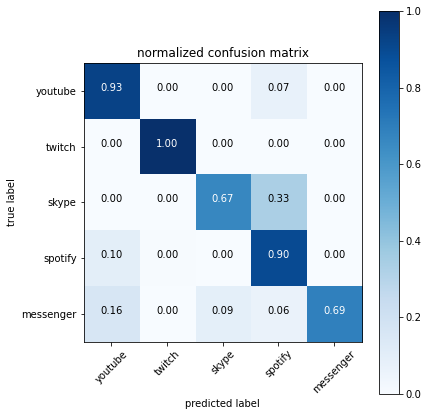

In [8]:
plot_confusion_matrix(true_labels,preds_labels)

In [9]:
get_scores(true_labels,preds_labels)

{'Accuracy': 0.8353036646038102,
 'Precision': 0.9092429794484416,
 'Recall': 0.9047619047619048,
 'F1_Score': 0.9051204695218724,
 'support': None}

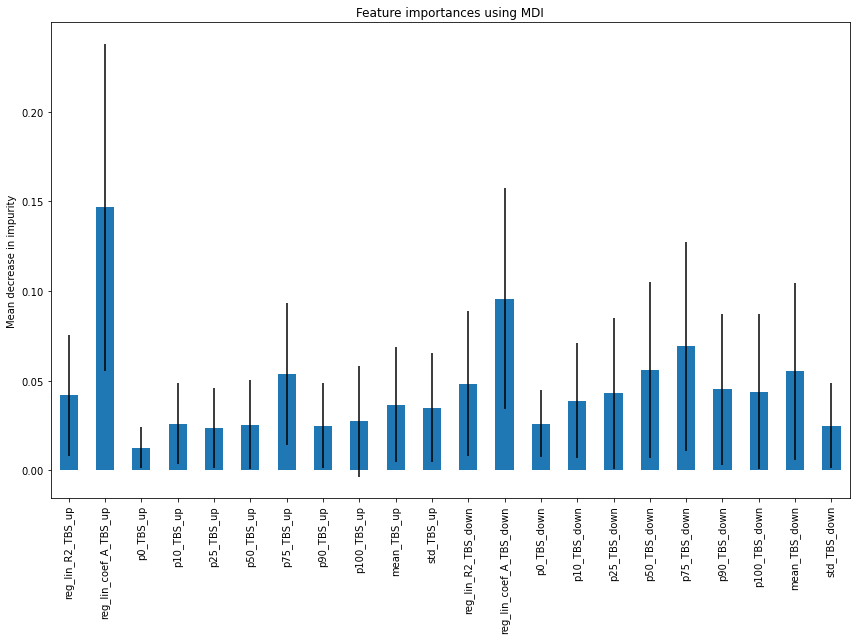

In [10]:
plot_feature_importance(model, training_data.columns[:-1])